/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


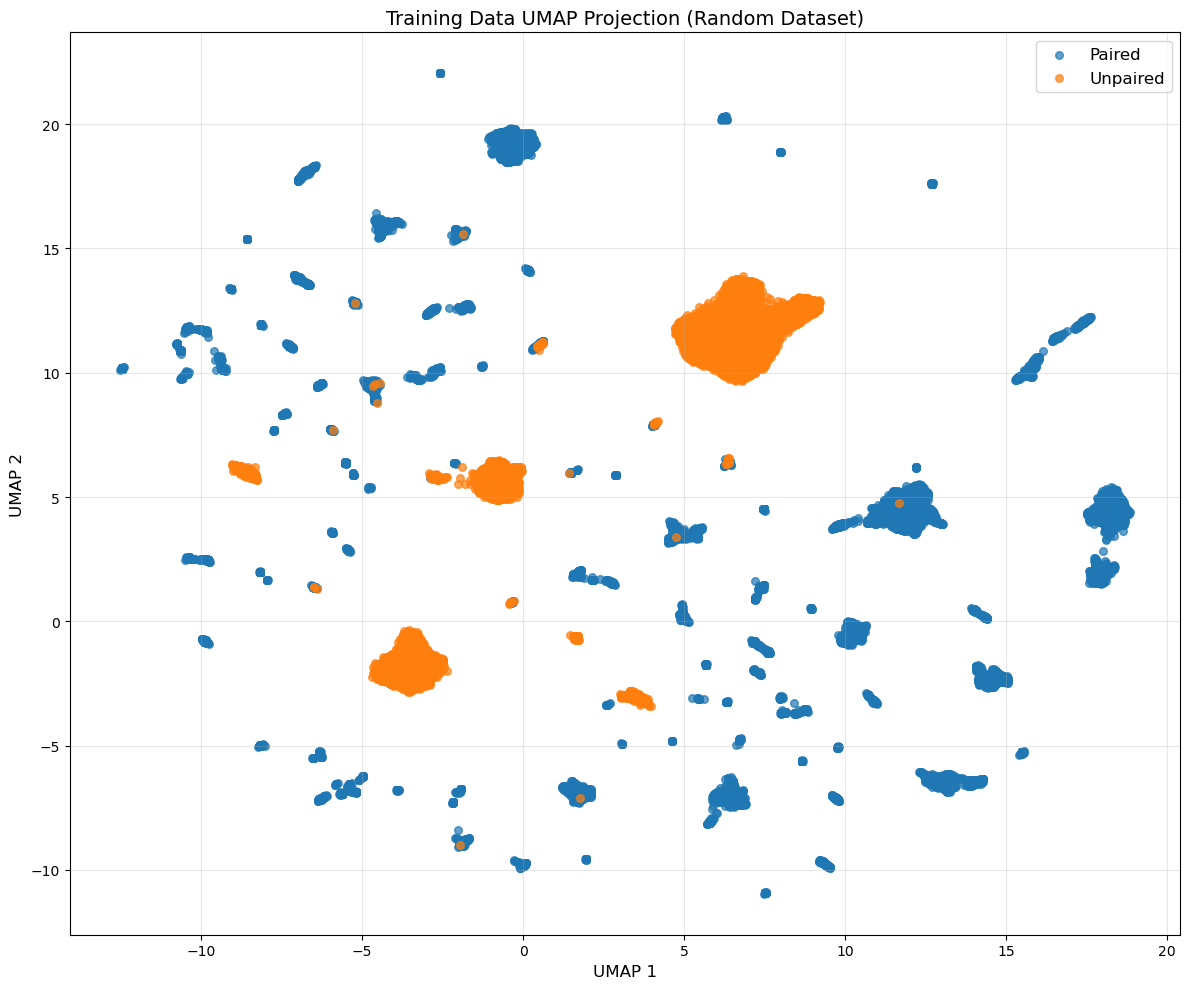

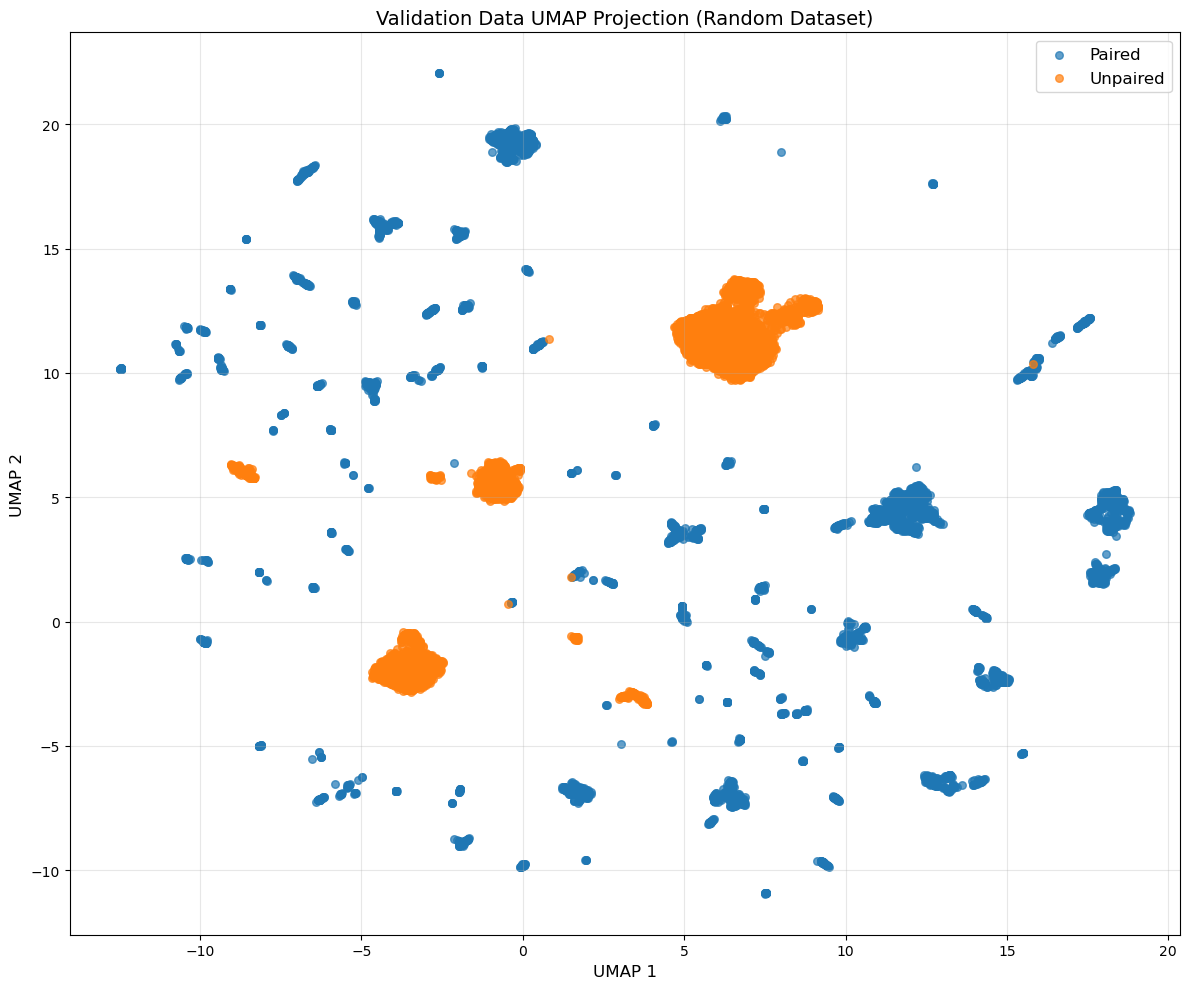

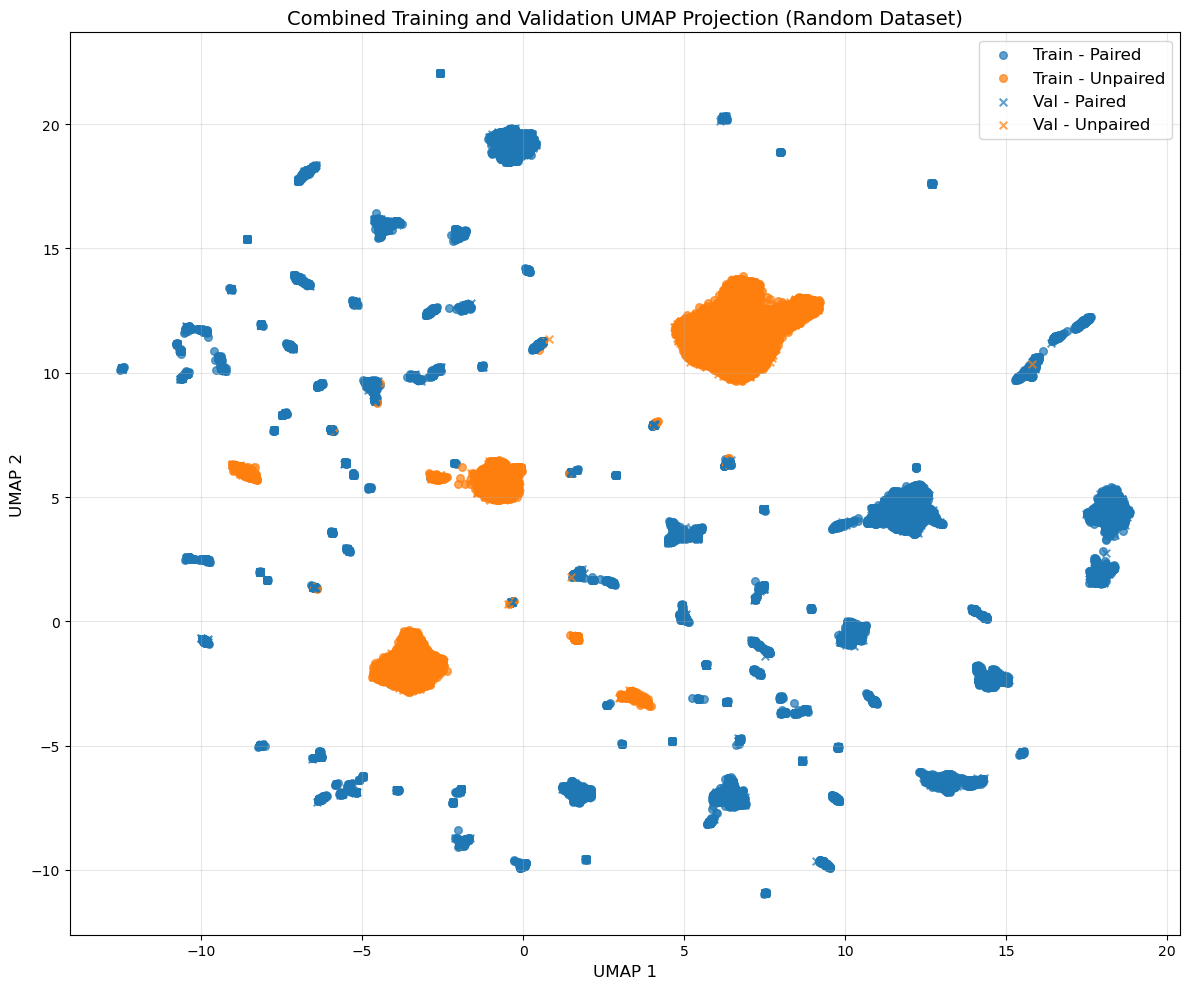

Training samples: 159798, Paired: 75053, Unpaired: 84745
Validation samples: 19975, Paired: 9392, Unpaired: 10583


In [5]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_final_dataset_random.csv')
df_val = pd.read_csv('./data/val_agg_final_dataset_random.csv')

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_random.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (Random Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (Random Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (Random Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


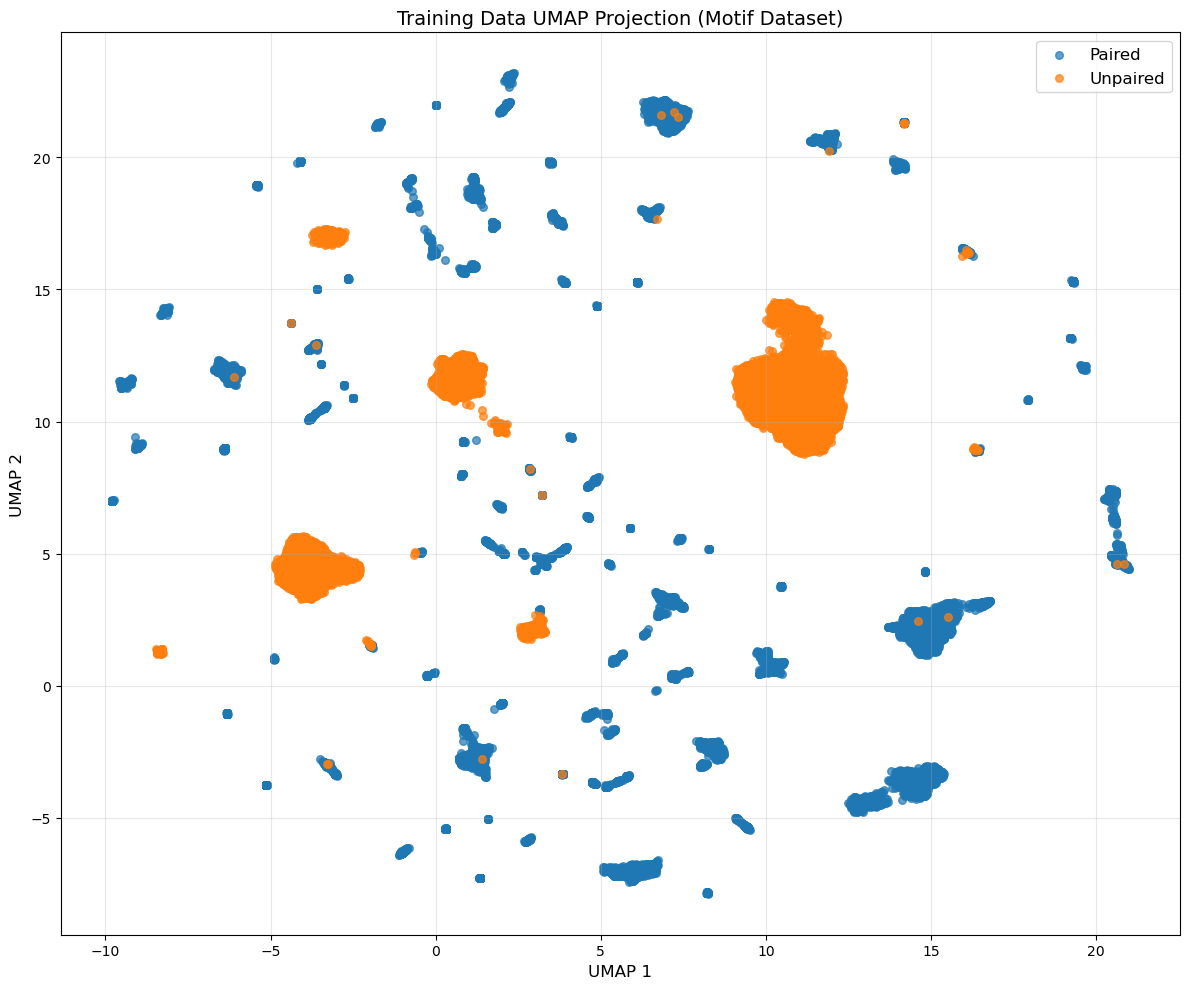

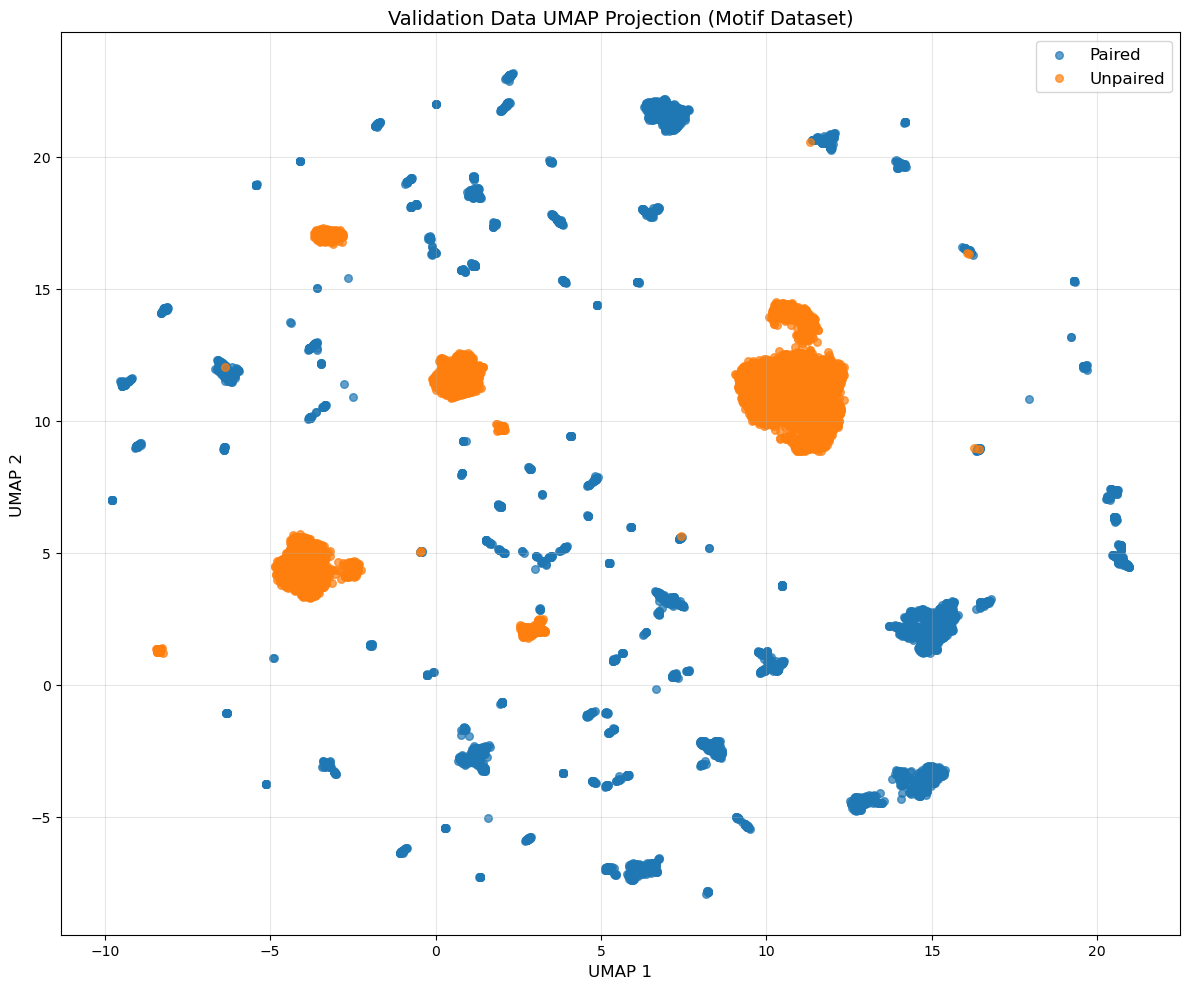

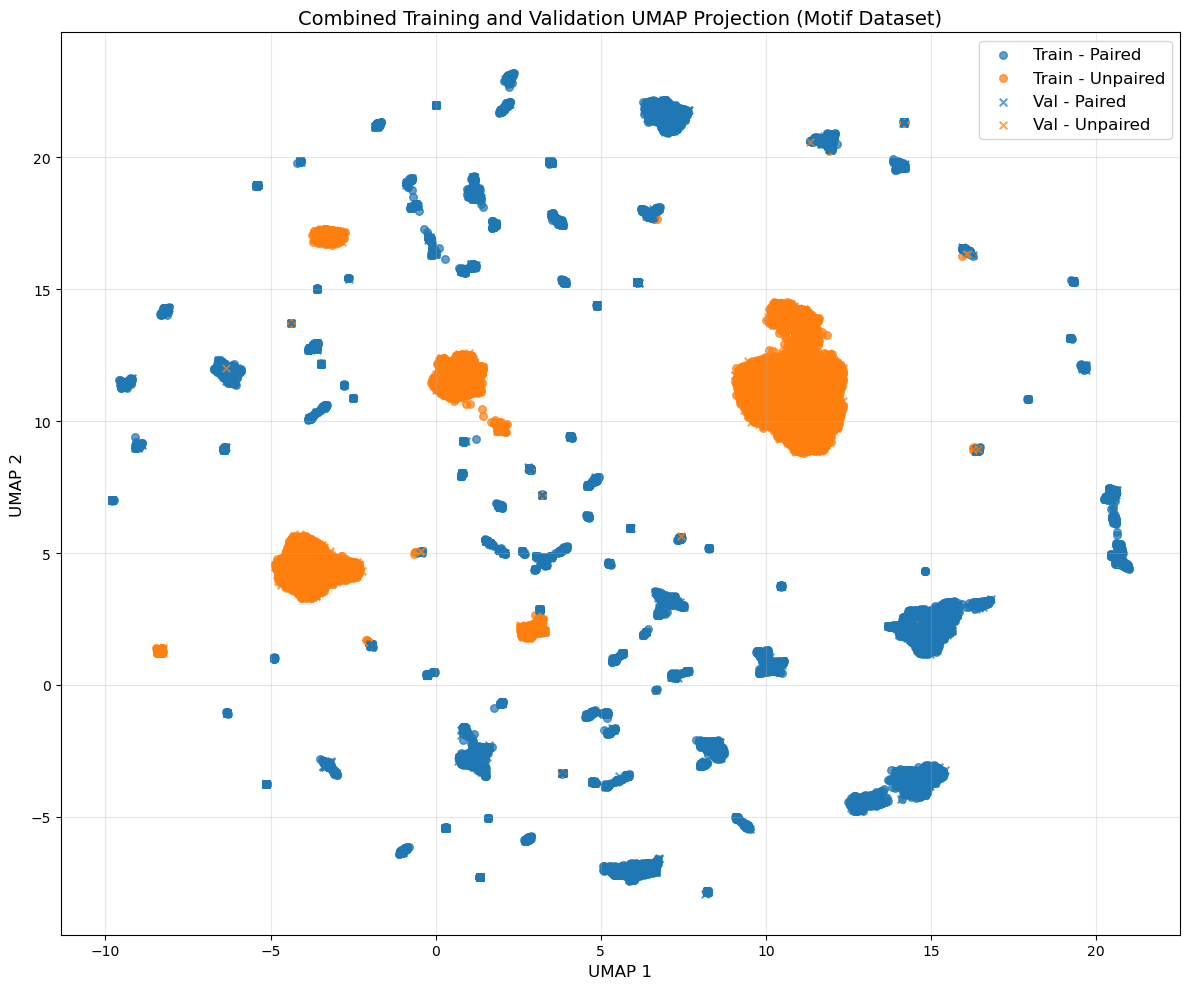

Training samples: 179033, Paired: 74893, Unpaired: 104140
Validation samples: 22379, Paired: 9251, Unpaired: 13128


In [9]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_final_dataset_only_motif.csv')
df_val = pd.read_csv('./data/val_agg_final_dataset_only_motif.csv')

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_motif.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (Motif Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (Motif Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (Motif Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


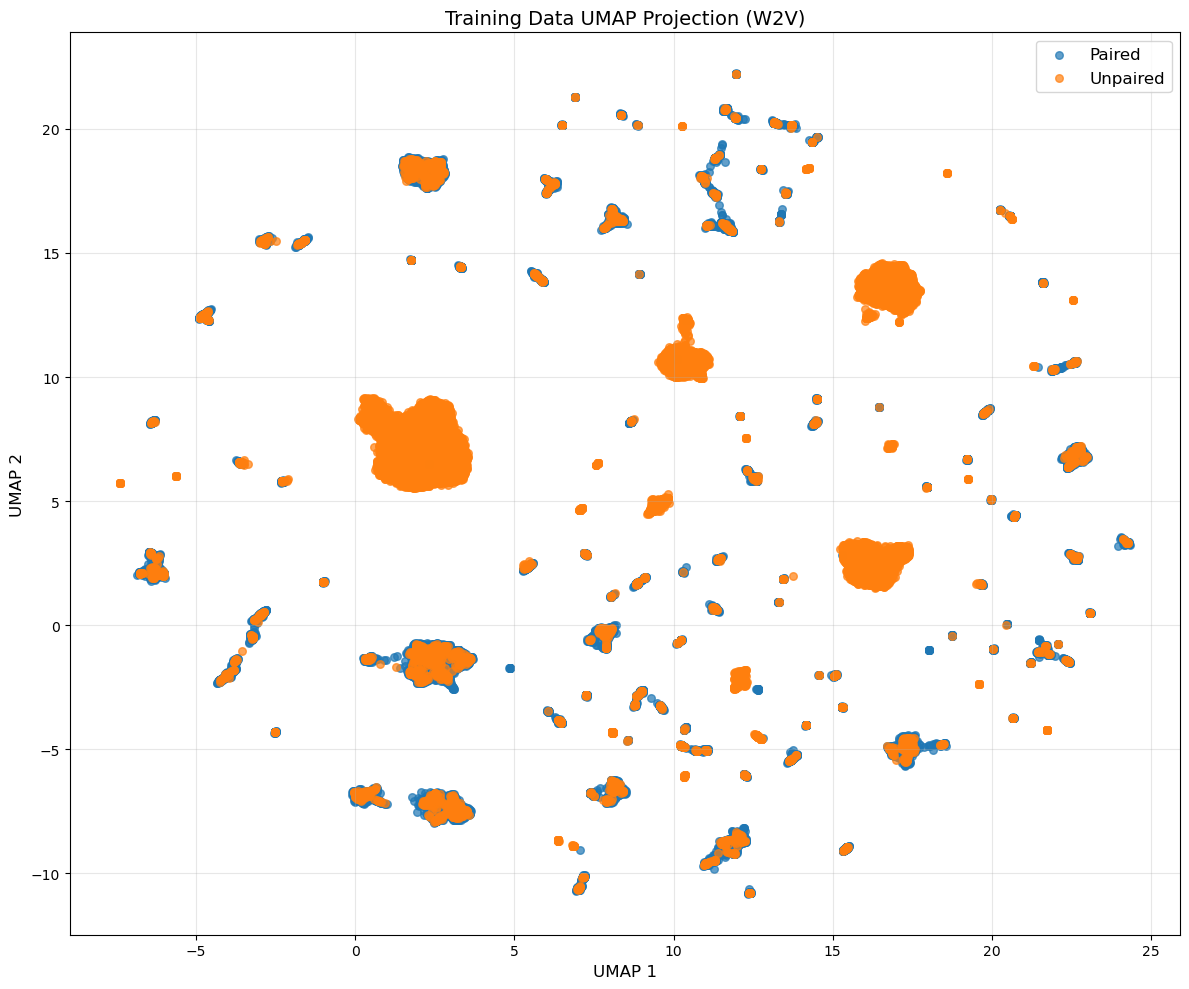

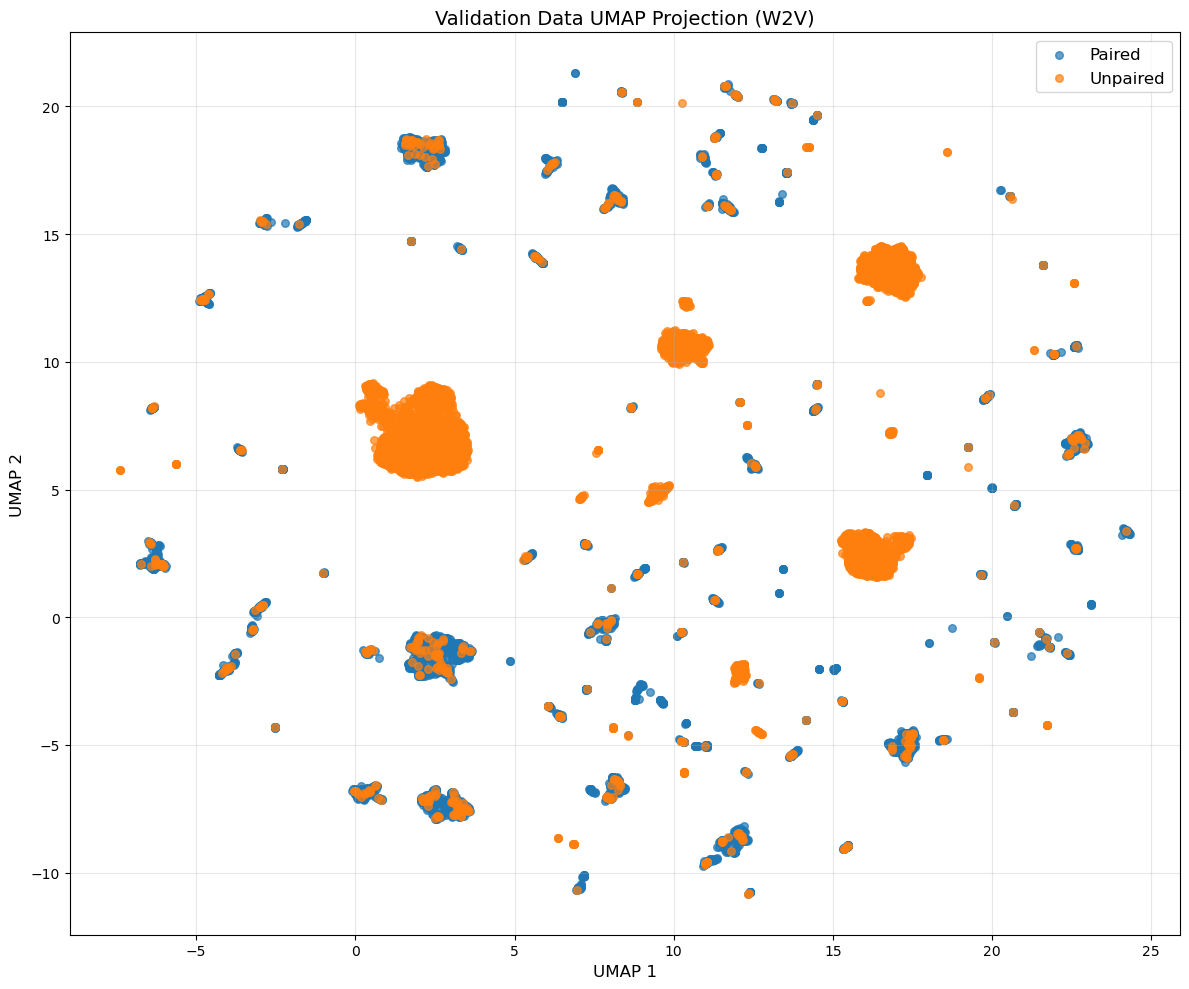

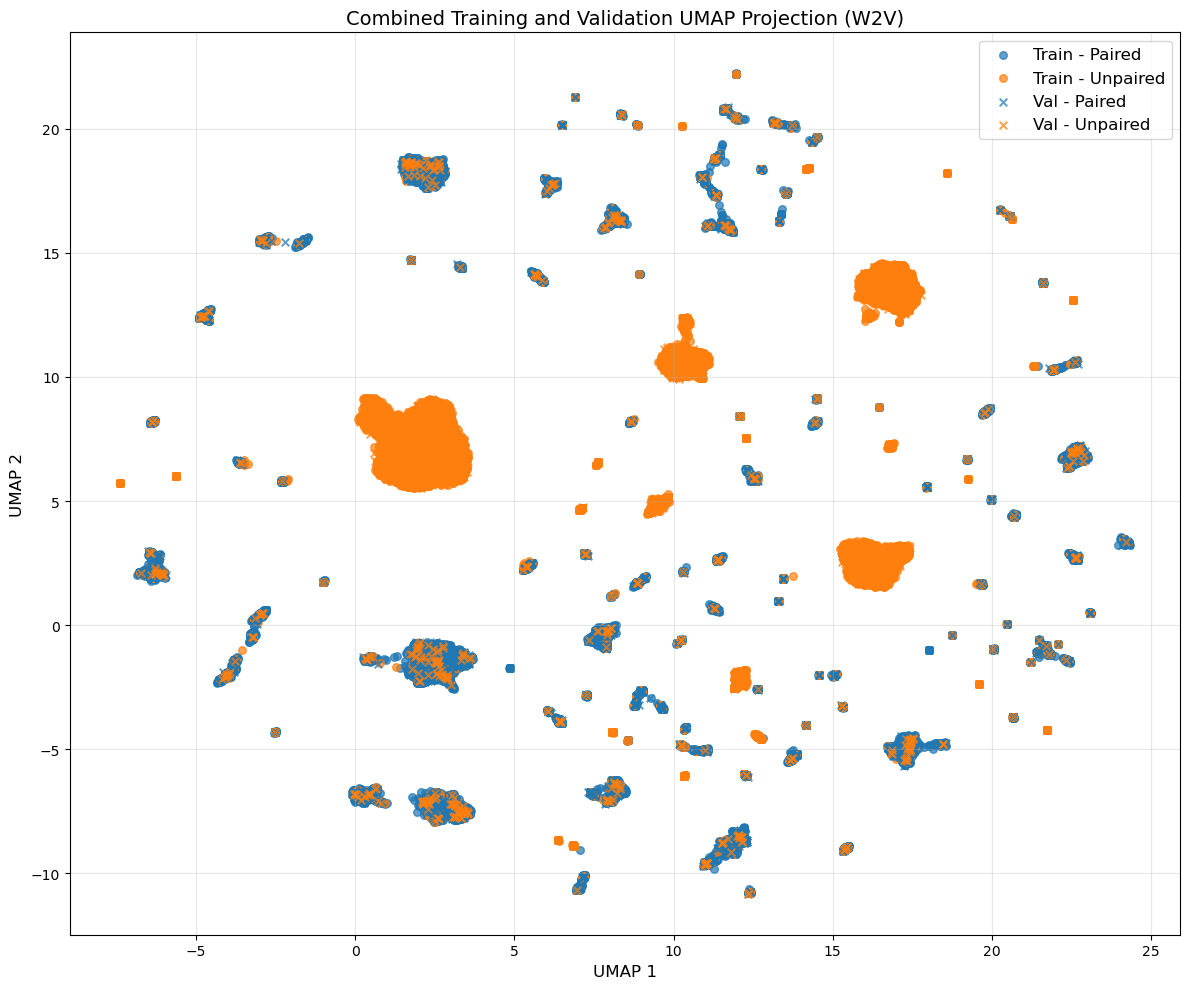

Training samples: 182443, Paired: 75163, Unpaired: 107280
Validation samples: 22805, Paired: 9313, Unpaired: 13492


In [3]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_new.csv')
df_val = pd.read_csv('./data/val_agg_new.csv') 

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_w2v_test.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (W2V)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (W2V)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (W2V)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


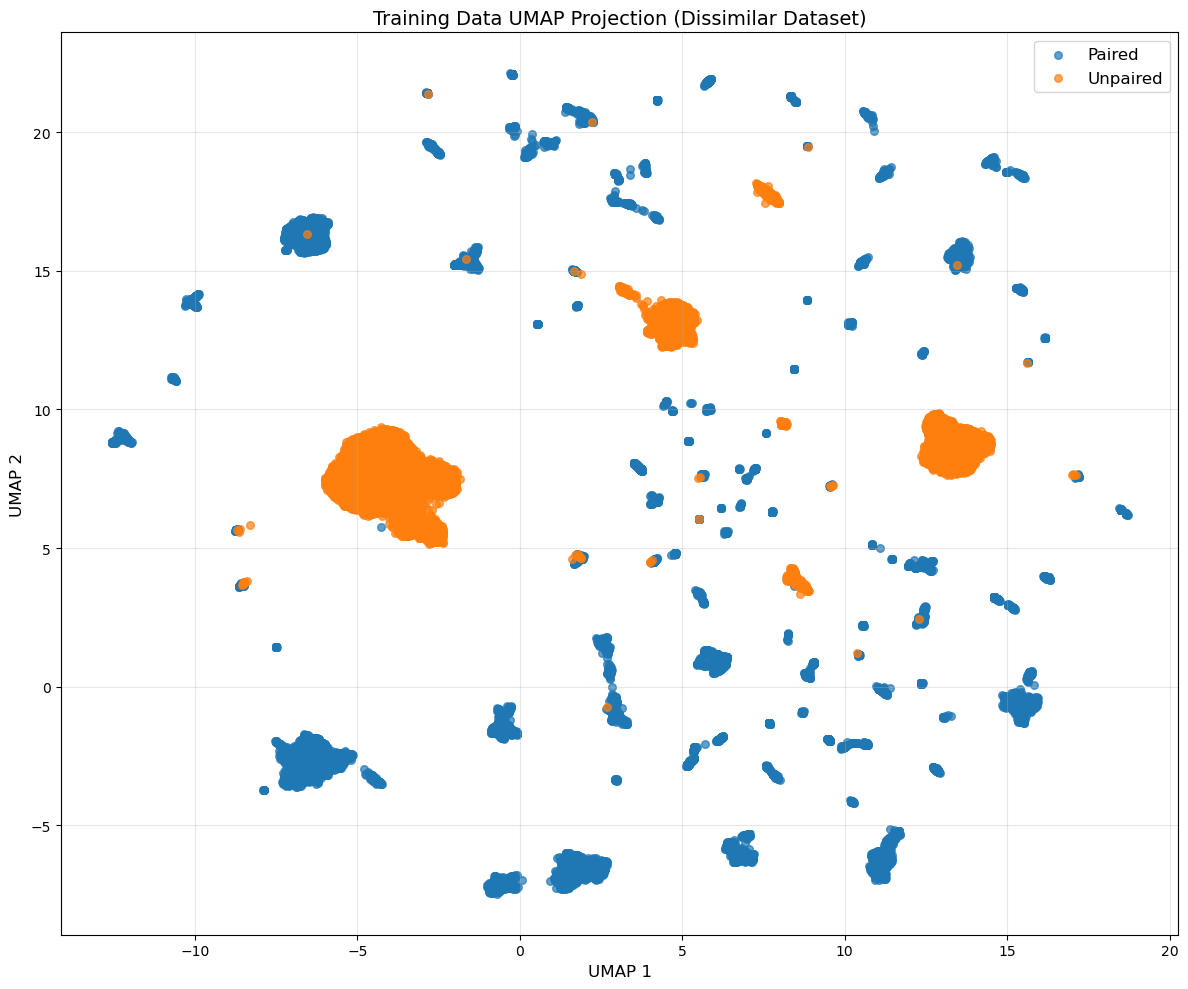

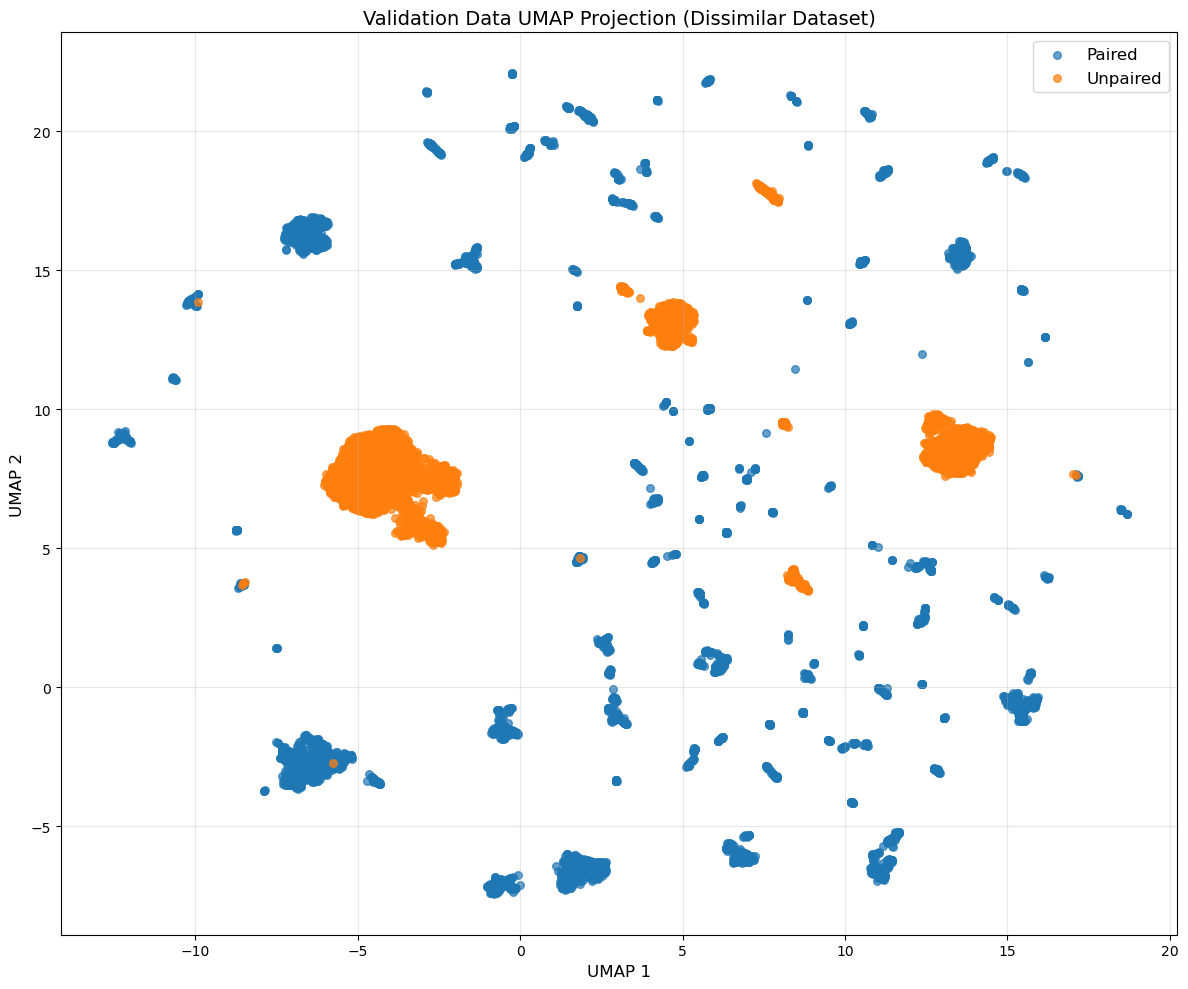

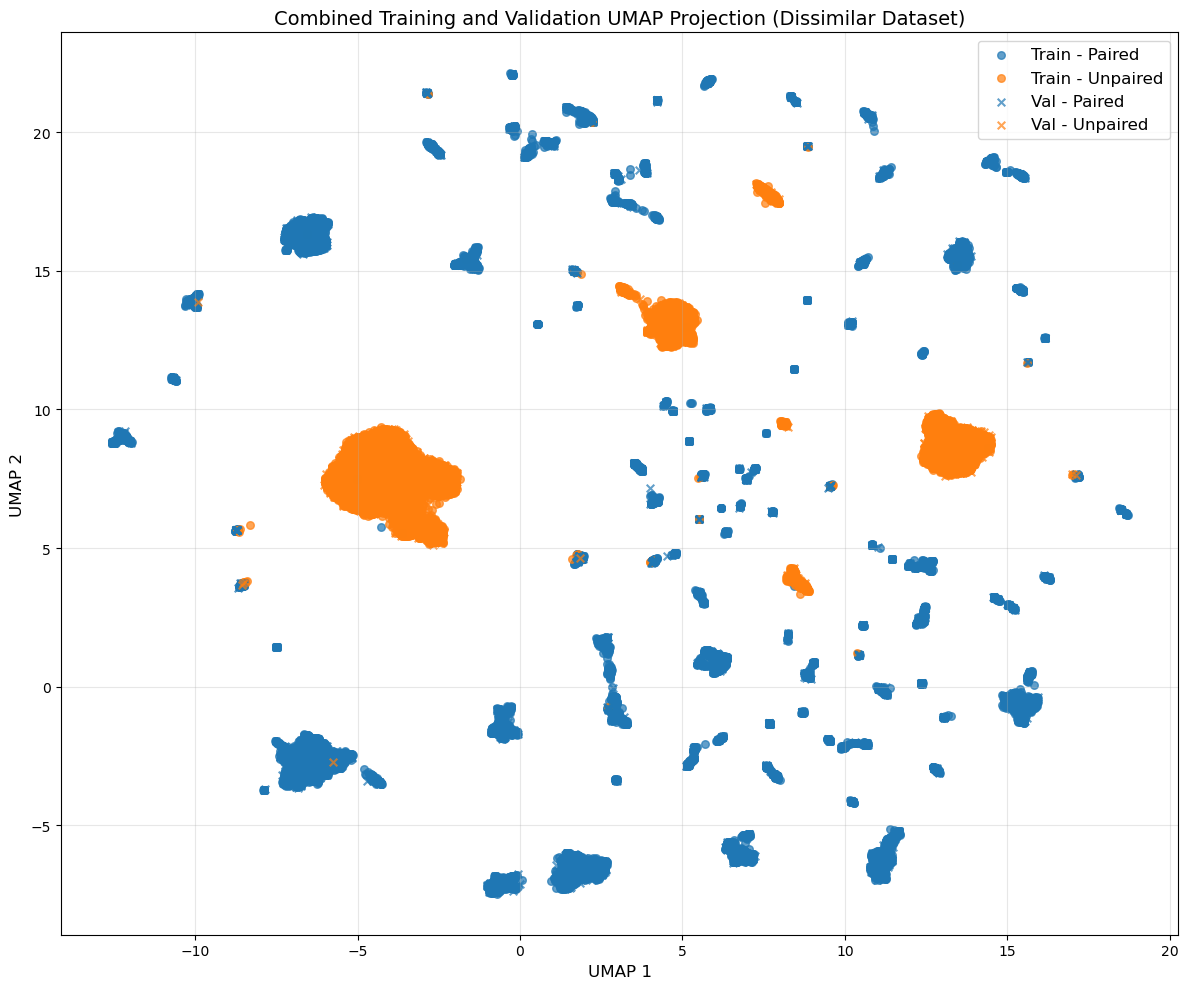

Training samples: 159797, Paired: 74888, Unpaired: 84909
Validation samples: 19975, Paired: 9454, Unpaired: 10521


In [4]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_final_dataset_dissimilar.csv')
df_val = pd.read_csv('./data/val_agg_final_dataset_dissimilar.csv')

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_dissimilar.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (Dissimilar Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (Dissimilar Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (Dissimilar Dataset)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


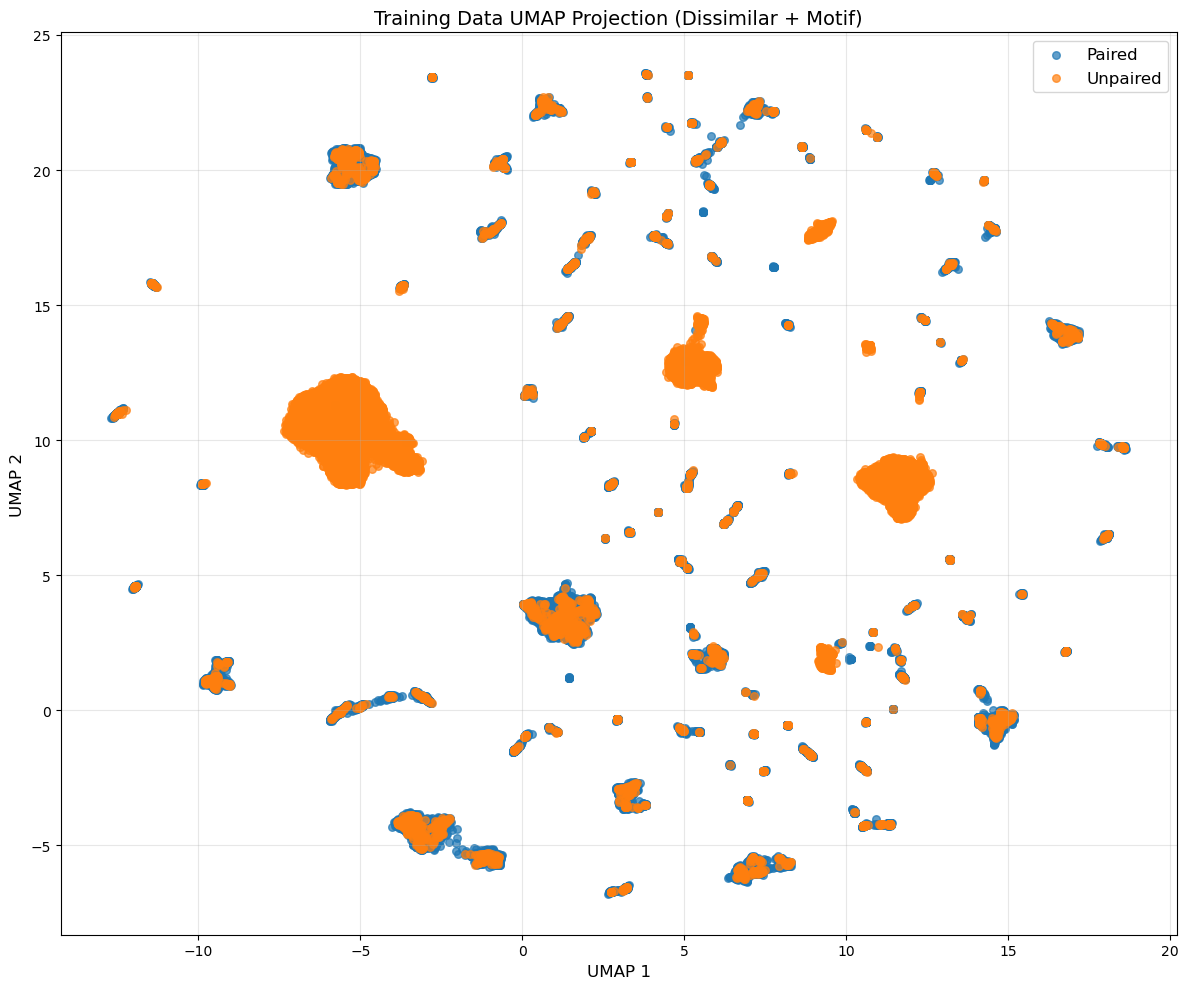

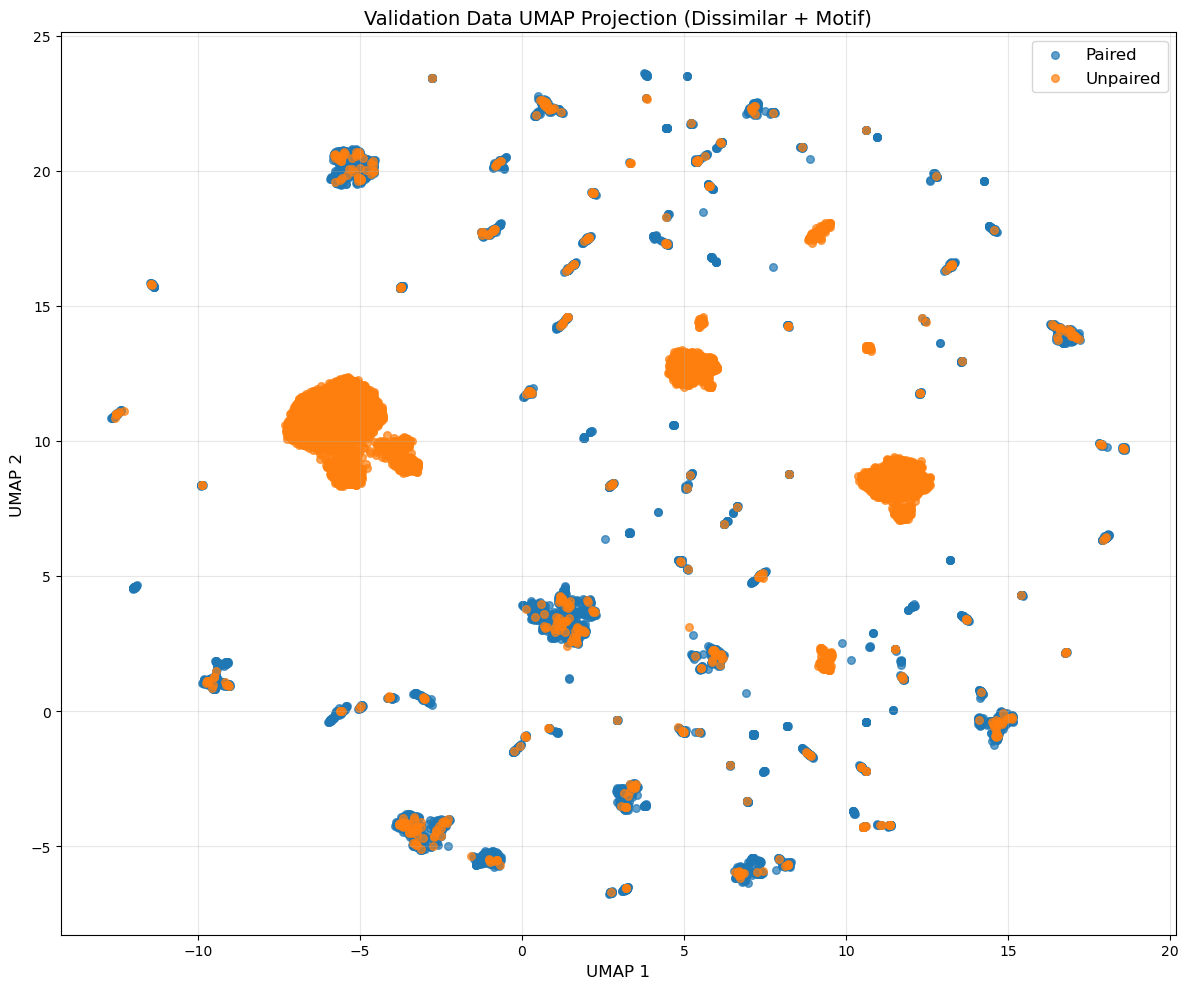

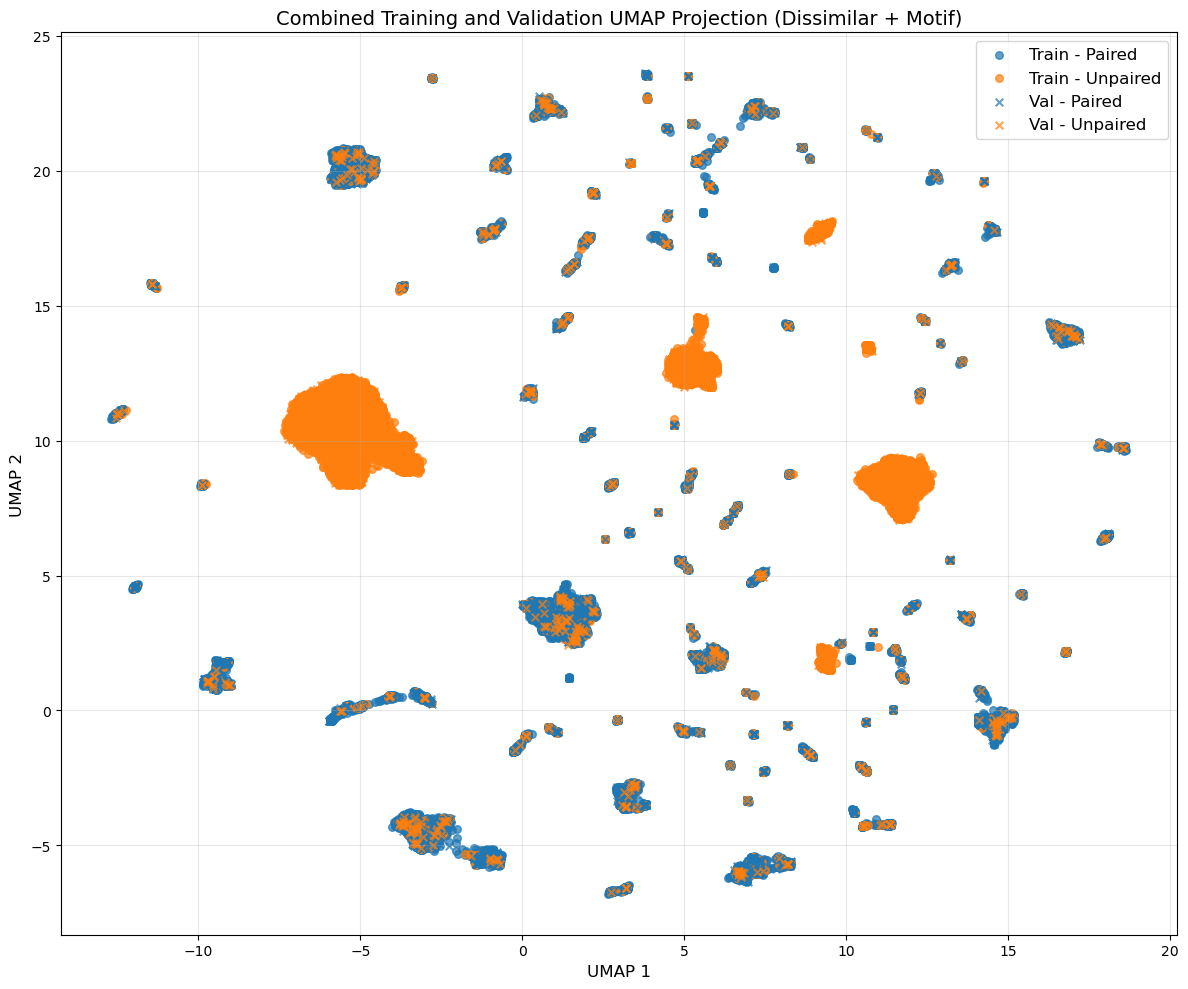

Training samples: 164489, Paired: 75047, Unpaired: 89442
Validation samples: 20561, Paired: 9314, Unpaired: 11247


In [11]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_final_dataset_dissimilar_motif_shuffle.csv')
df_val = pd.read_csv('./data/val_agg_final_dataset_dissimilar_motif_shuffle.csv')

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_dis_mot.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data 
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (Dissimilar + Motif)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data 
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (Dissimilar + Motif)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (Dissimilar + Motif)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


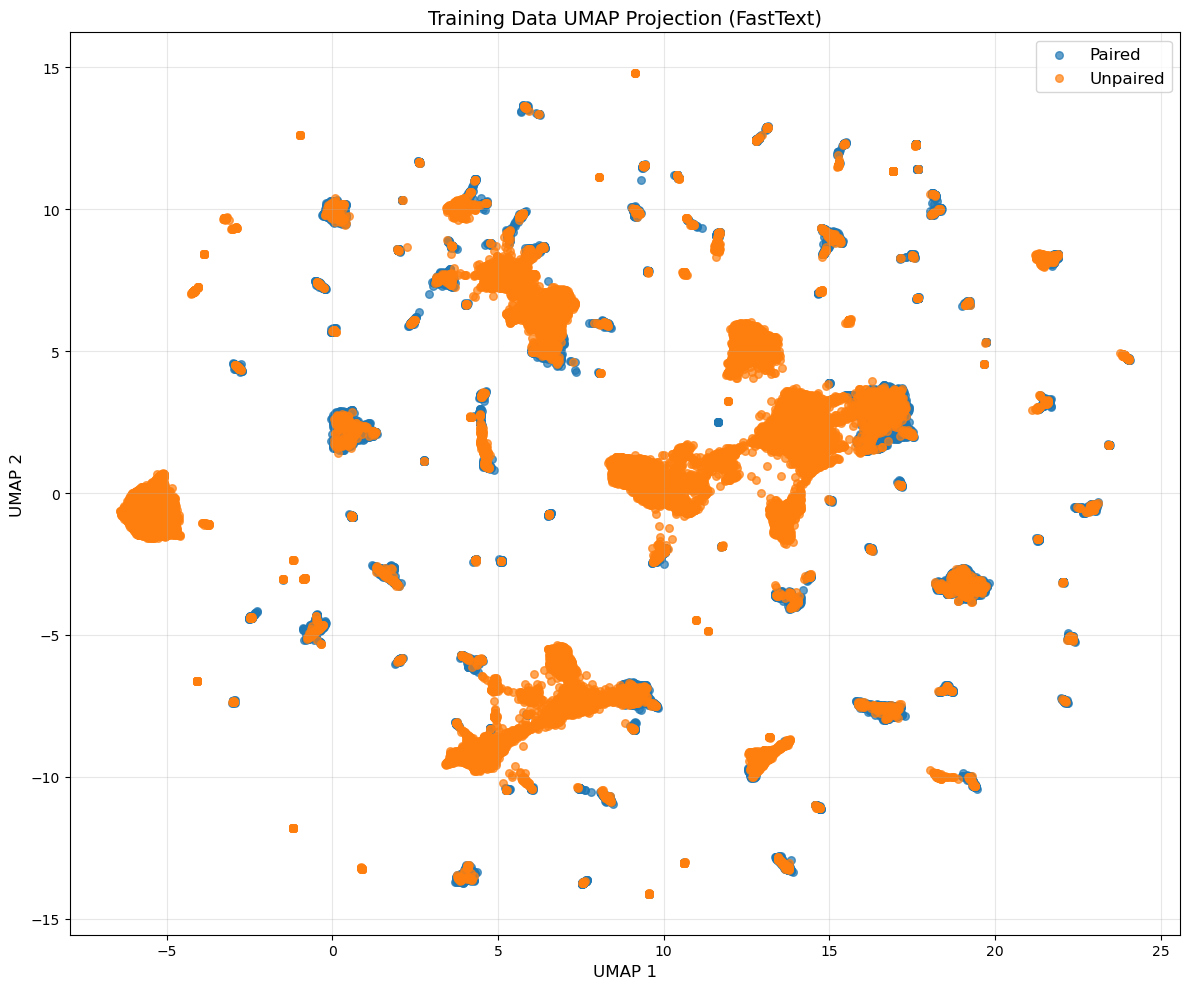

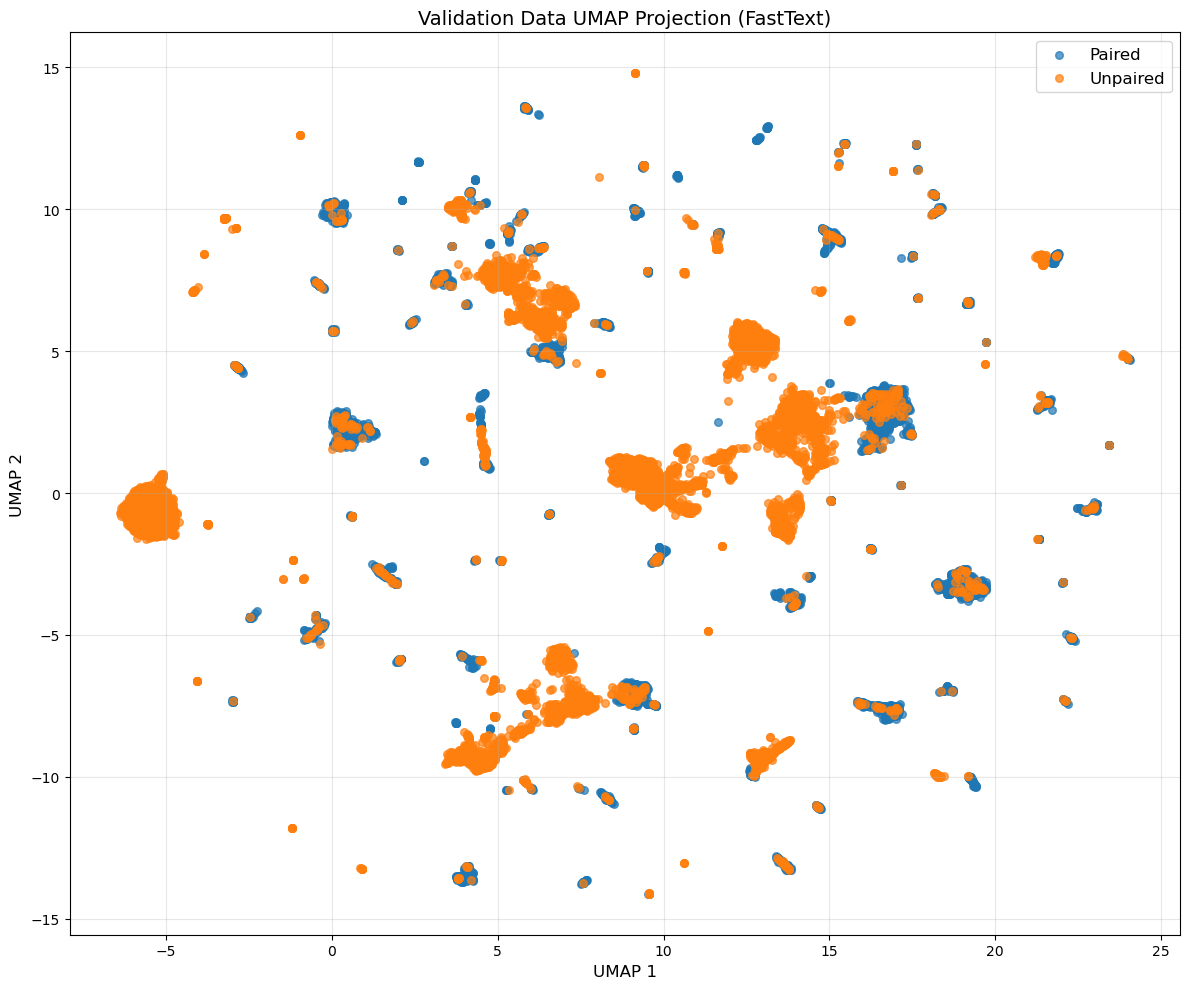

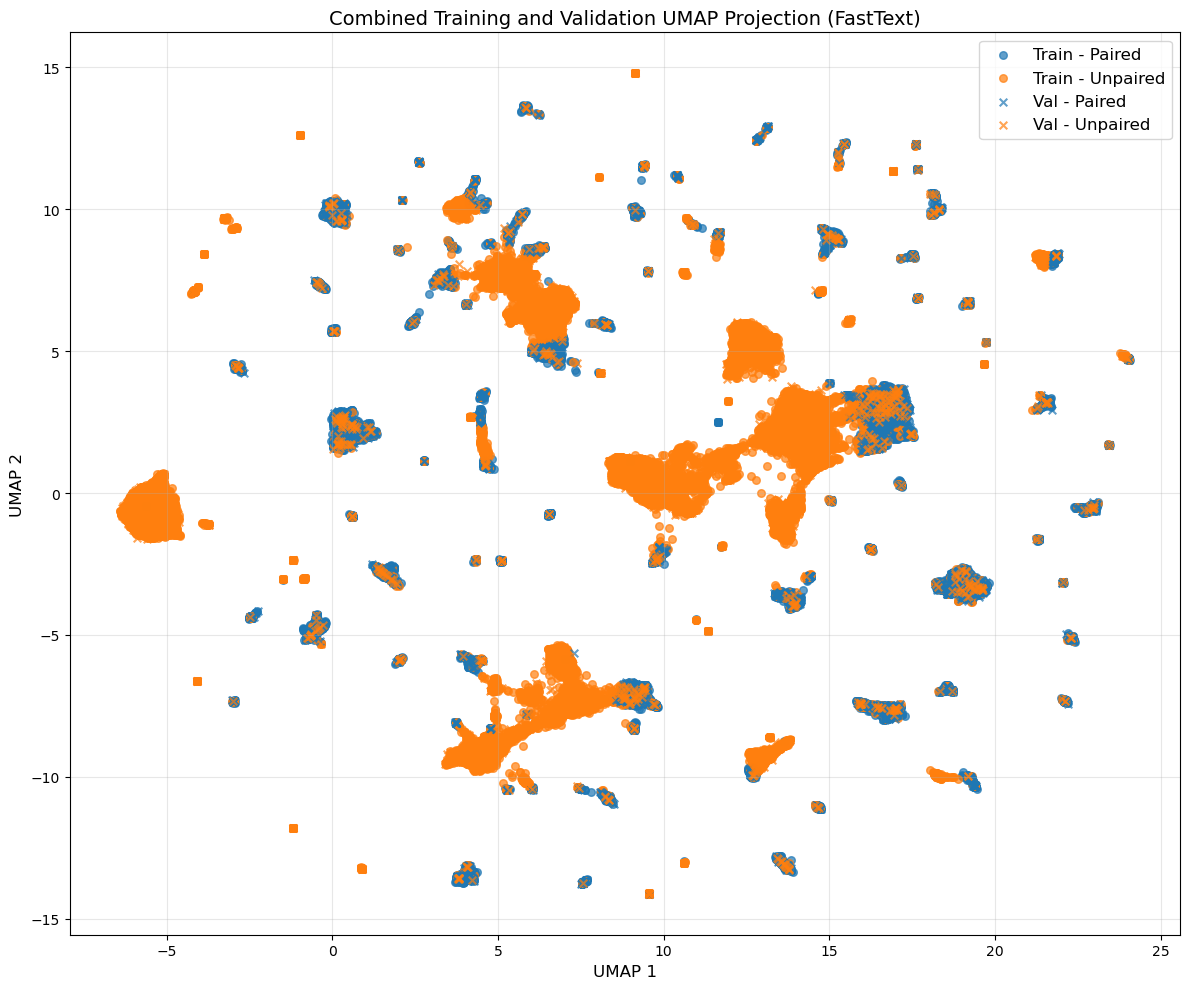

Training samples: 182443, Paired: 75163, Unpaired: 107280
Validation samples: 22805, Paired: 9313, Unpaired: 13492


In [2]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load both training and validation datasets
df_train = pd.read_csv('./data/train_agg_new.csv')
df_val = pd.read_csv('./data/val_agg_new.csv')  

# Concatenate the datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Create a column to track the source (train or validation)
df_combined['source'] = ['train'] * len(df_train) + ['val'] * len(df_val)

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_fast_new.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df_combined['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Create masks for each category
train_mask = df_combined['source'] == 'train'
val_mask = df_combined['source'] == 'val'
paired_mask = df_combined['paired'] == 1
unpaired_mask = df_combined['paired'] == 0

# Plot 1: Training data
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Training Data UMAP Projection (FastText)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Validation data 
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            s=30, 
            alpha=0.7, 
            label='Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            s=30, 
            alpha=0.7, 
            label='Unpaired')

plt.title('Validation Data UMAP Projection (FastText)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Combined Training and Validation data
plt.figure(figsize=(12, 10))

# Training data
plt.scatter(X_umap[(train_mask) & (paired_mask), 0], 
            X_umap[(train_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Paired')

plt.scatter(X_umap[(train_mask) & (unpaired_mask), 0], 
            X_umap[(train_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='o',
            s=30, 
            alpha=0.7, 
            label='Train - Unpaired')

# Validation data
plt.scatter(X_umap[(val_mask) & (paired_mask), 0], 
            X_umap[(val_mask) & (paired_mask), 1],
            color='#1f77b4',  # blue
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Paired')

plt.scatter(X_umap[(val_mask) & (unpaired_mask), 0], 
            X_umap[(val_mask) & (unpaired_mask), 1],
            color='#ff7f0e',  # orange
            marker='x',
            s=30, 
            alpha=0.7, 
            label='Val - Unpaired')

plt.title('Combined Training and Validation UMAP Projection (FastText)', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the datasets
print(f"Training samples: {len(df_train)}, Paired: {df_train['paired'].sum()}, Unpaired: {len(df_train) - df_train['paired'].sum()}")
print(f"Validation samples: {len(df_val)}, Paired: {df_val['paired'].sum()}, Unpaired: {len(df_val) - df_val['paired'].sum()}")

/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


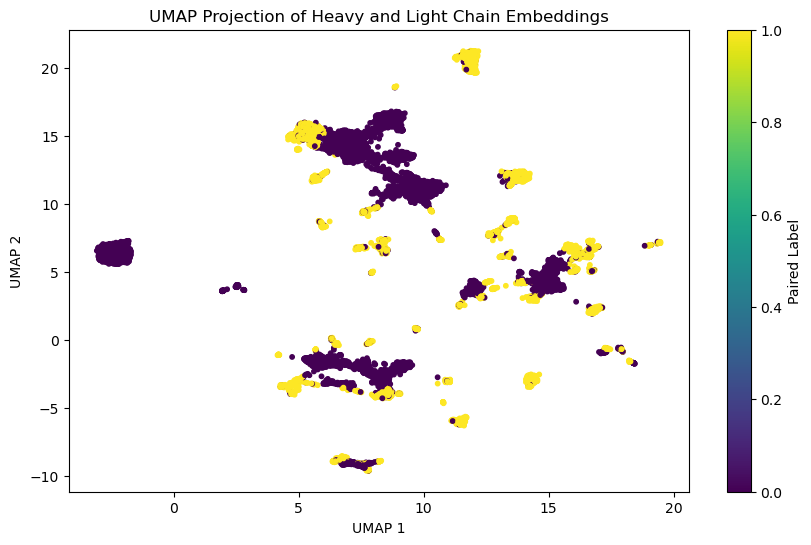

In [1]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('./data/test_agg_new.csv')

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_test.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df['light_chain']])

# Combine the embeddings (e.g., by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Plot the UMAP results, colored by the 'paired' label
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['paired'], cmap='viridis', s=10)
plt.colorbar(label='Paired Label')
plt.title('UMAP Projection of Heavy and Light Chain Embeddings')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


/home/FYP/ngzu0002/.conda/envs/FYP/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Number of paired sequences: 9358
Number of unpaired sequences: 13448
Found 9322 close pairs (before filtering to max_pairs)
Found 50 close pairs of paired/unpaired sequences (distance <= 0.5)

Sample of close paired/unpaired sequences:
                                        paired_heavy  \
0  EVQLVESGGGLVQPGGSLRLSCAASGFTFRDHYMDWVRQAPGKGLE...   
1  QVQLQQWGAGLLKPSETLSLTCAVSGGSFSNYHWSWIRQPPGKGLE...   
2  QVQLVQSGAEVKKPGASVKVSCKAFGYTFVDYDIVWVRQAAGLGLE...   
3  QVQLQESGPGLVKPSETLSLTCTVSGASISGYYWSWIRQPAGKGLE...   
4  EVQVVESGGGLVQPGGSLRLSCAGSGFTLSDHYMDWVRQAPGKGLE...   

                                        paired_light  \
0  DIQMTQSPSTLSASLGDRVTVTCRASQSISTWLAWYQQKPGKAPKL...   
1  SYELTQPPSVSVSPGQTASITCSGDKLGNKYTWWYQQKPGQSPVLV...   
2  TVLTQSPDTLSLSPGERATLSCRASESVSDQYLAWFQQKPGQAPRL...   
3  DIVMTQSPDSLAVSLGERATISCKSSQSILYSSTSKNYLAWYQQKP...   
4  QSVLTQTPSASGTPGQRVTISCSGSSSNIGSSYVHWYRQLPGTAPK...   

                                      unpaired_heavy  \
0  QVQLVESGGGVVQPGESLRLSCDASGFRFNK

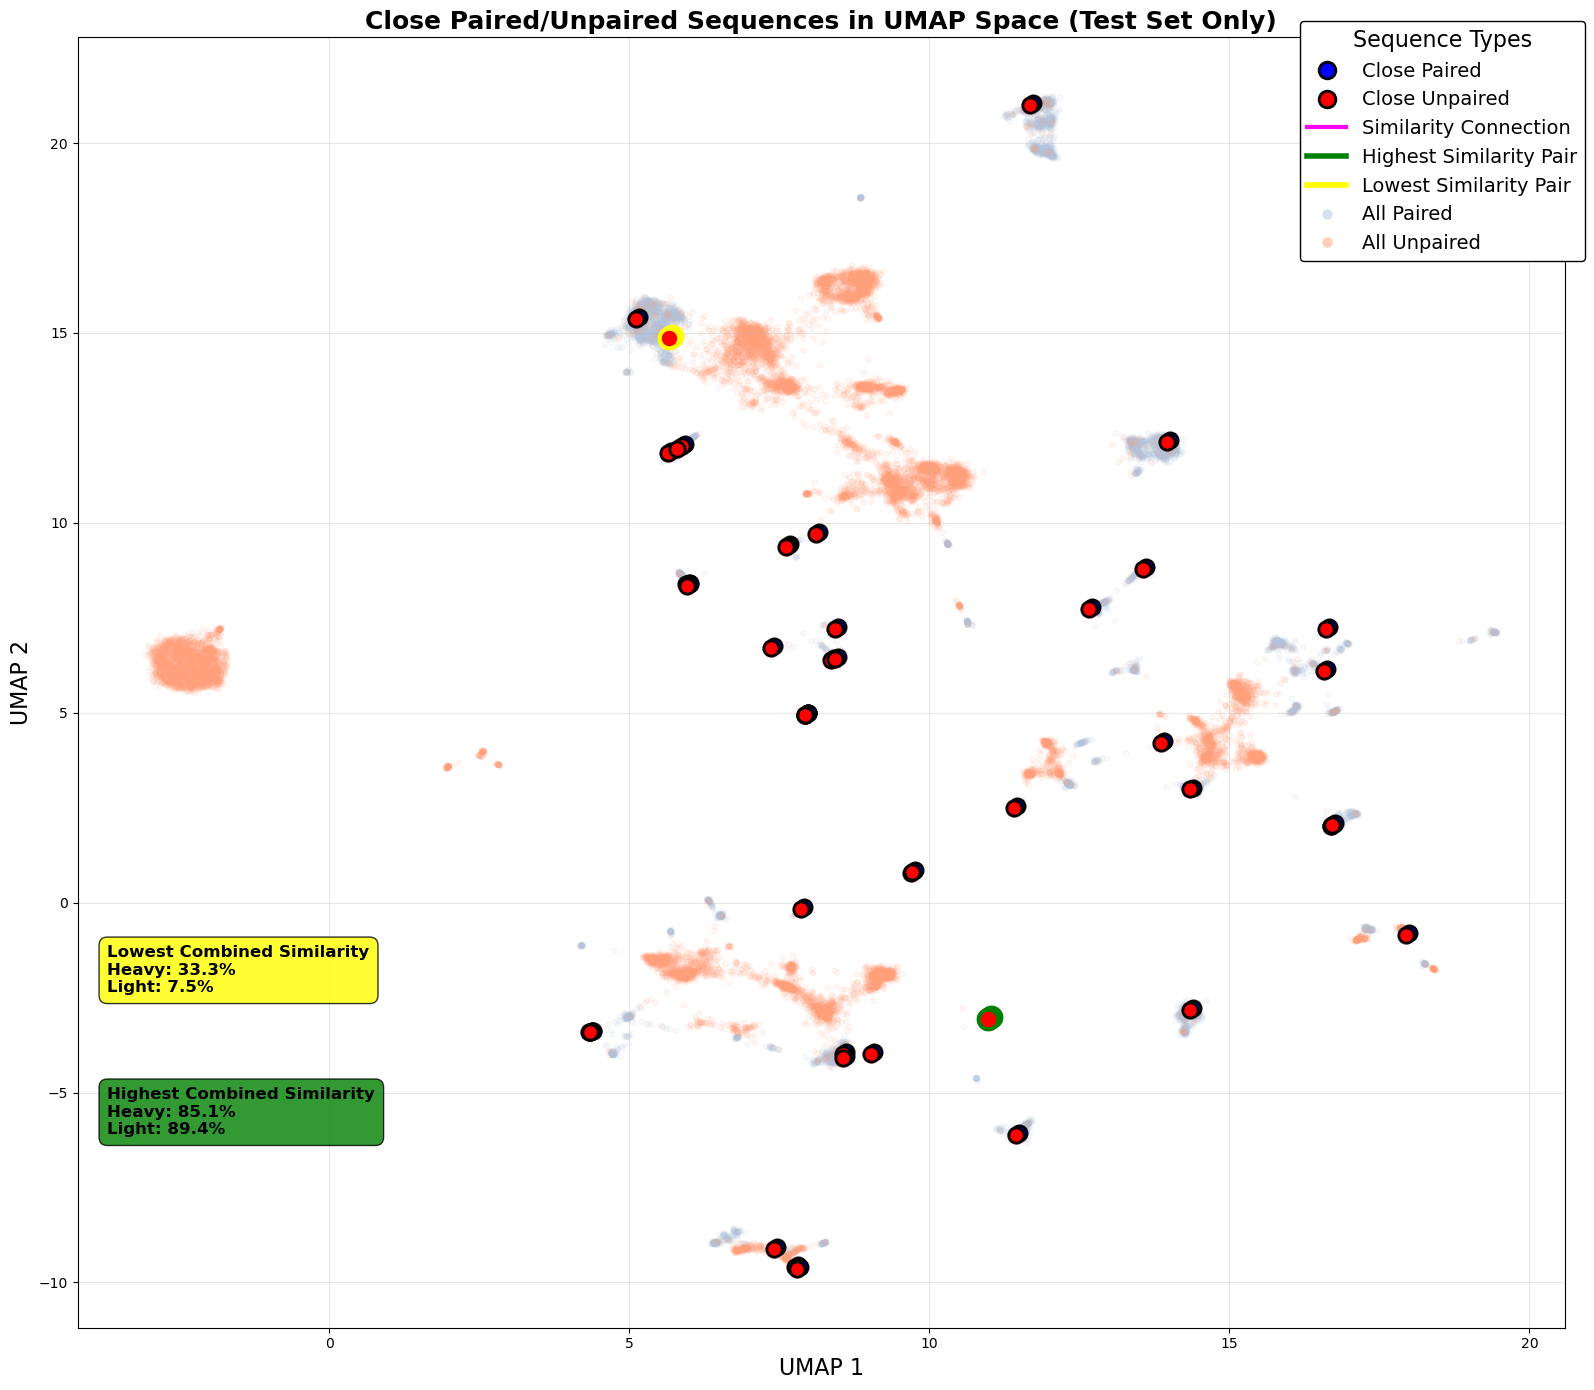

In [12]:
import pandas as pd
import numpy as np
import pickle
import torch
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import KDTree

# Load only the test dataset
df = pd.read_csv('./data/test_agg_new.csv')

# Load the pre-computed embeddings from the pickle file
with open("encoded_sequences_test.pkl", "rb") as f:
    seq2mat_dict = pickle.load(f)

# Function to get the average embedding for a given sequence
def get_average_embedding(seq, seq2mat_dict):
    if seq in seq2mat_dict:
        embedding = seq2mat_dict[seq]
        return embedding.mean(dim=0).numpy()  # Compute mean along sequence length
    else:
        return np.zeros(seq2mat_dict[next(iter(seq2mat_dict))].shape[1])  # Handle missing cases

# Generate embeddings for heavy and light chains
heavy_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df['heavy_chain']])
light_embeddings = np.array([get_average_embedding(seq, seq2mat_dict) for seq in df['light_chain']])

# Combine the embeddings (by concatenation)
embeddings = np.hstack((heavy_embeddings, light_embeddings))  # Concatenate along the feature axis

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(embeddings)

# Add UMAP coordinates to the dataframe for easy reference
df['umap_x'] = X_umap[:, 0]
df['umap_y'] = X_umap[:, 1]

# Create masks for paired and unpaired sequences
paired_mask = df['paired'] == 1
unpaired_mask = df['paired'] == 0

# Extract indices and coordinates for paired and unpaired sequences
paired_indices = np.where(paired_mask)[0]
unpaired_indices = np.where(unpaired_mask)[0]

paired_coords = X_umap[paired_mask]
unpaired_coords = X_umap[unpaired_mask]

# Function to find the closest sequences of opposite pairing status
def find_closest_opposite_pairs(df, umap_coords, distance_threshold=1.0, max_pairs=50):
    """
    Find pairs of sequences where one is paired and one is unpaired,
    but they are very close in the embedding space.
    
    Parameters:
    df: DataFrame with sequence data
    umap_coords: UMAP coordinates for all sequences
    distance_threshold: Maximum distance to consider sequences as "close"
    max_pairs: Maximum number of pairs to return
    
    Returns:
    List of tuples with (paired_idx, unpaired_idx, distance)
    """
    paired_mask = df['paired'] == 1
    unpaired_mask = df['paired'] == 0
    
    paired_indices = np.where(paired_mask)[0]
    unpaired_indices = np.where(unpaired_mask)[0]
    
    paired_coords = umap_coords[paired_mask]
    unpaired_coords = umap_coords[unpaired_mask]
    
    print(f"Number of paired sequences: {len(paired_indices)}")
    print(f"Number of unpaired sequences: {len(unpaired_indices)}")
    
    # Use KDTree for efficient nearest neighbor search
    # Build a KDTree for unpaired sequences
    unpaired_tree = KDTree(unpaired_coords)
    
    # Find closest unpaired sequence for each paired sequence
    close_pairs = []
    
    for i, (paired_idx, coord) in enumerate(zip(paired_indices, paired_coords)):
        # Find the closest unpaired sequence
        distance, nn_idx = unpaired_tree.query(coord, k=1)
        
        if distance <= distance_threshold:
            unpaired_idx = unpaired_indices[nn_idx]
            close_pairs.append((paired_idx, unpaired_idx, distance))
    
    # Sort by distance and take the closest pairs
    close_pairs.sort(key=lambda x: x[2])
    print(f"Found {len(close_pairs)} close pairs (before filtering to max_pairs)")
    return close_pairs[:max_pairs]

# Find close pairs
distance_threshold = 0.5  # Adjust this threshold based on your UMAP scale
close_pairs = find_closest_opposite_pairs(df, X_umap, distance_threshold)

# Print the results
print(f"Found {len(close_pairs)} close pairs of paired/unpaired sequences (distance <= {distance_threshold})")

# Create a table of the close pairs with their sequences
close_pairs_data = []

for paired_idx, unpaired_idx, distance in close_pairs:
    paired_row = df.iloc[paired_idx]
    unpaired_row = df.iloc[unpaired_idx]
    
    pair_data = {
        'paired_heavy': paired_row['heavy_chain'],
        'paired_light': paired_row['light_chain'],
        'unpaired_heavy': unpaired_row['heavy_chain'],
        'unpaired_light': unpaired_row['light_chain'],
        'umap_distance': distance
    }
    close_pairs_data.append(pair_data)

# Create a DataFrame with the close pairs information
close_pairs_df = pd.DataFrame(close_pairs_data)
print("\nSample of close paired/unpaired sequences:")
print(close_pairs_df.head())

# Save the close pairs to a CSV file
close_pairs_df.to_csv('test_close_paired_unpaired_sequences.csv', index=False)

# Function to calculate sequence similarity
def calculate_sequence_similarity(seq1, seq2):
    """Calculate a simple similarity score between two sequences"""
    # Count matching characters
    matches = sum(a == b for a, b in zip(seq1, seq2))
    # Return as percentage of the shorter sequence length
    return (matches / min(len(seq1), len(seq2))) * 100

# Add sequence similarity information to the close pairs
for i, (paired_idx, unpaired_idx, _) in enumerate(close_pairs):
    paired_heavy = df.iloc[paired_idx]['heavy_chain']
    paired_light = df.iloc[paired_idx]['light_chain']
    
    unpaired_heavy = df.iloc[unpaired_idx]['heavy_chain']
    unpaired_light = df.iloc[unpaired_idx]['light_chain']
    
    heavy_similarity = calculate_sequence_similarity(paired_heavy, unpaired_heavy)
    light_similarity = calculate_sequence_similarity(paired_light, unpaired_light)
    
    close_pairs_df.loc[i, 'heavy_similarity'] = heavy_similarity
    close_pairs_df.loc[i, 'light_similarity'] = light_similarity
    
    print(f"\nPair {i+1} - UMAP Distance: {close_pairs_df.loc[i, 'umap_distance']:.4f}")
    print(f"Heavy chain similarity: {heavy_similarity:.1f}%")
    print(f"Light chain similarity: {light_similarity:.1f}%")
    print(f"Paired:")
    print(f"H: {paired_heavy[:30]}... (len: {len(paired_heavy)})")
    print(f"L: {paired_light[:30]}... (len: {len(paired_light)})")
    print(f"Unpaired:")
    print(f"H: {unpaired_heavy[:30]}... (len: {len(unpaired_heavy)})")
    print(f"L: {unpaired_light[:30]}... (len: {len(unpaired_light)})")

# Save the enhanced close pairs data
close_pairs_df.to_csv('test_close_paired_unpaired_sequences_with_similarity.csv', index=False)

# Visualize the close pairs on the UMAP plot
plt.figure(figsize=(16, 14))

# Print counts to debug
print(f"Number of close pairs: {len(close_pairs)}")

# Create separate collections for paired and unpaired points in close pairs
paired_close_x, paired_close_y = [], []
unpaired_close_x, unpaired_close_y = [], []

# First collect coordinates for all close pairs
for paired_idx, unpaired_idx, _ in close_pairs:
    # Store coordinates for paired and unpaired points
    paired_close_x.append(X_umap[paired_idx, 0])
    paired_close_y.append(X_umap[paired_idx, 1])
    unpaired_close_x.append(X_umap[unpaired_idx, 0])
    unpaired_close_y.append(X_umap[unpaired_idx, 1])

# Print debug information
print(f"Paired points: {len(paired_close_x)}")
print(f"Unpaired points: {len(unpaired_close_x)}")

# Calculate combined similarity (sum of heavy and light)
close_pairs_df['combined_similarity'] = close_pairs_df['heavy_similarity'] + close_pairs_df['light_similarity']

# Find pair with HIGHEST combined similarity
highest_combined_idx = close_pairs_df['combined_similarity'].idxmax()  
highest_combined_pair = close_pairs_df.loc[highest_combined_idx]

# Find pair with LOWEST combined similarity
lowest_combined_idx = close_pairs_df['combined_similarity'].idxmin()
lowest_combined_pair = close_pairs_df.loc[lowest_combined_idx]

# Apply a small offset to prevent perfect overlap
offset = 0.05  # Small offset for better visibility

# Plot background points with very low alpha
plt.scatter(X_umap[paired_mask, 0], X_umap[paired_mask, 1], 
            color='lightsteelblue', s=15, alpha=0.08, label='All Paired')
plt.scatter(X_umap[unpaired_mask, 0], X_umap[unpaired_mask, 1], 
            color='lightsalmon', s=15, alpha=0.08, label='All Unpaired')

# Draw connecting lines BEFORE plotting points to ensure they're visible
for i in range(len(paired_close_x)):
    # Draw visible lines connecting each pair
    plt.plot([paired_close_x[i], unpaired_close_x[i]], 
             [paired_close_y[i], unpaired_close_y[i]], 
             '-', color='magenta', alpha=1.0, linewidth=3.0,
             zorder=10)  # Very high zorder

# Create a "halo" effect for the unpaired (red) points
plt.scatter(unpaired_close_x, unpaired_close_y, 
            color='red', s=180, alpha=0.3,  # Larger size with lower alpha
            edgecolor='black', linewidth=0,
            marker='o', zorder=11)

# Draw the paired points slightly offset to the upper-right
plt.scatter([x + offset for x in paired_close_x], 
            [y + offset for y in paired_close_y], 
            color='blue', s=120, alpha=1.0, 
            edgecolor='black', linewidth=2.0,
            marker='o', label='Close Paired',
            zorder=12)  # Higher zorder to appear on top

# Draw the unpaired points (smaller than the halo)
plt.scatter(unpaired_close_x, unpaired_close_y, 
            color='red', s=120, alpha=1.0, 
            edgecolor='black', linewidth=2.0,
            marker='o', label='Close Unpaired',
            zorder=13)  # Even higher zorder

# Highest similarity pair
# First the paired point
plt.scatter(paired_close_x[highest_combined_idx] + offset, 
            paired_close_y[highest_combined_idx] + offset, 
            color='blue', s=200, alpha=1.0, 
            edgecolor='green', linewidth=3.0,
            marker='o', zorder=21)

# Then the unpaired point
plt.scatter(unpaired_close_x[highest_combined_idx], 
            unpaired_close_y[highest_combined_idx], 
            color='red', s=200, alpha=1.0, 
            edgecolor='green', linewidth=3.0,
            marker='o', zorder=21)

# Draw the connecting line for the highest similarity pair
plt.plot([paired_close_x[highest_combined_idx] + offset, unpaired_close_x[highest_combined_idx]], 
         [paired_close_y[highest_combined_idx] + offset, unpaired_close_y[highest_combined_idx]], 
         '-', color='green', alpha=1.0, linewidth=4.0,
         zorder=20)  # High zorder to ensure visibility

# Lowest similarity pair
# First the paired point
plt.scatter(paired_close_x[lowest_combined_idx] + offset, 
            paired_close_y[lowest_combined_idx] + offset, 
            color='blue', s=200, alpha=1.0, 
            edgecolor='yellow', linewidth=3.0,
            marker='o', zorder=21)

# Then the unpaired point
plt.scatter(unpaired_close_x[lowest_combined_idx], 
            unpaired_close_y[lowest_combined_idx], 
            color='red', s=200, alpha=1.0, 
            edgecolor='yellow', linewidth=3.0,
            marker='o', zorder=21)

# Draw the connecting line for the lowest similarity pair
plt.plot([paired_close_x[lowest_combined_idx] + offset, unpaired_close_x[lowest_combined_idx]], 
         [paired_close_y[lowest_combined_idx] + offset, unpaired_close_y[lowest_combined_idx]], 
         '-', color='yellow', alpha=1.0, linewidth=4.0,
         zorder=20)  # High zorder to ensure visibility

plt.title('Close Paired/Unpaired Sequences in UMAP Space (Test Set Only)', fontsize=18, fontweight='bold')
plt.xlabel('UMAP 1', fontsize=16)
plt.ylabel('UMAP 2', fontsize=16)

# Create a custom legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
           markeredgecolor='black', markersize=12, label='Close Paired', markeredgewidth=2.0),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
           markeredgecolor='black', markersize=12, label='Close Unpaired', markeredgewidth=2.0),
    Line2D([0], [0], color='magenta', lw=3, label='Similarity Connection'),
    Line2D([0], [0], color='green', lw=4, label='Highest Similarity Pair'),
    Line2D([0], [0], color='yellow', lw=4, label='Lowest Similarity Pair'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightsteelblue', 
           markersize=8, alpha=0.5, label='All Paired'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightsalmon', 
           markersize=8, alpha=0.5, label='All Unpaired')
]

legend = plt.legend(
    handles=legend_elements,
    fontsize=14, 
    loc='upper right',
    framealpha=1.0,
    edgecolor='black',
    title="Sequence Types",
    title_fontsize=16,
    bbox_to_anchor=(1.02, 1.02)
)

plt.grid(alpha=0.3)

# Print information about the highest similarity pair
print("\n=== PAIR WITH HIGHEST COMBINED SIMILARITY ===")  
print(f"Pair index: {highest_combined_idx}")
print(f"UMAP distance: {highest_combined_pair['umap_distance']:.4f}")
print(f"Heavy chain similarity: {highest_combined_pair['heavy_similarity']:.1f}%")
print(f"Light chain similarity: {highest_combined_pair['light_similarity']:.1f}%")
print(f"Combined similarity: {highest_combined_pair['combined_similarity']:.1f}%")

print("\nPaired sequences:")
print(f"H: {highest_combined_pair['paired_heavy'][:50]}...")
print(f"L: {highest_combined_pair['paired_light'][:50]}...")
print("\nUnpaired sequences:")
print(f"H: {highest_combined_pair['unpaired_heavy'][:50]}...")
print(f"L: {highest_combined_pair['unpaired_light'][:50]}...")

# Print information about the lowest similarity pair
print("\n=== PAIR WITH LOWEST COMBINED SIMILARITY ===")
print(f"Pair index: {lowest_combined_idx}")
print(f"UMAP distance: {lowest_combined_pair['umap_distance']:.4f}")
print(f"Heavy chain similarity: {lowest_combined_pair['heavy_similarity']:.1f}%")
print(f"Light chain similarity: {lowest_combined_pair['light_similarity']:.1f}%")
print(f"Combined similarity: {lowest_combined_pair['combined_similarity']:.1f}%")

print("\nPaired sequences:")
print(f"H: {lowest_combined_pair['paired_heavy'][:50]}...")
print(f"L: {lowest_combined_pair['paired_light'][:50]}...")
print("\nUnpaired sequences:")
print(f"H: {lowest_combined_pair['unpaired_heavy'][:50]}...")
print(f"L: {lowest_combined_pair['unpaired_light'][:50]}...")

# Add annotation for the highest similarity pair
plt.annotate(
    "Highest Combined Similarity\n"  
    f"Heavy: {highest_combined_pair['heavy_similarity']:.1f}%\n"
    f"Light: {highest_combined_pair['light_similarity']:.1f}%",
    xy=(0.02, 0.15), xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.5", fc="green", ec="black", alpha=0.8),
    fontsize=12,
    fontweight='bold'
)

# Add annotation for the lowest similarity pair
plt.annotate(
    "Lowest Combined Similarity\n"  
    f"Heavy: {lowest_combined_pair['heavy_similarity']:.1f}%\n"
    f"Light: {lowest_combined_pair['light_similarity']:.1f}%",
    xy=(0.02, 0.26), xycoords='axes fraction',  # Position above the highest similarity annotation
    bbox=dict(boxstyle="round,pad=0.5", fc="yellow", ec="black", alpha=0.8),
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.savefig('test_close_paired_unpaired_sequences_both_similarities.png', dpi=300, bbox_inches='tight')  
plt.show()